In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#downlad mnist Data Set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
#maximum value of X_train
X_train.max()

255

In [5]:
#Normalize data with divided max value '255'
X_train, X_test = (X_train/255) , (X_test/255) 

In [6]:
X_train.max()

1.0

In [7]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [8]:
model = Sequential()

In [9]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=784, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(units=397, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(units=203, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(units=106, activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Dense(units=10, activation='softmax'))

In [10]:
model.compile(optimizer='adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [11]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3281 - accuracy: 0.9050 - val_loss: 0.1543 - val_accuracy: 0.9564
Epoch 2/500
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1669 - accuracy: 0.9547 - val_loss: 0.1254 - val_accuracy: 0.9625
Epoch 3/500
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1275 - accuracy: 0.9654 - val_loss: 0.0969 - val_accuracy: 0.9732
Epoch 4/500
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1122 - accuracy: 0.9696 - val_loss: 0.0839 - val_accuracy: 0.9771
Epoch 5/500
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1039 - accuracy: 0.9724 - val_loss: 0.0775 - val_accuracy: 0.9787
Epoch 6/500
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0898 - accuracy: 0.9765 - val_loss: 0.0875 - val_accuracy: 0.9777
Epoch 7/500
60000/60000 [=========================

In [12]:
import pandas as pd

In [13]:
model_loss = pd.DataFrame(model.history.history)

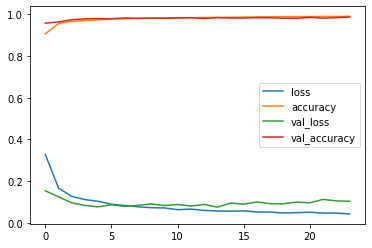

In [14]:
model_loss.plot()

In [15]:
predictions = model.predict_classes(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(confusion_matrix(y_test, predictions))

[[ 974    1    0    1    0    0    2    1    1    0]
 [   0 1128    1    2    0    1    2    0    1    0]
 [   3    0 1013    1    1    0    0    5    8    1]
 [   1    0    1  998    0    2    0    1    3    4]
 [   1    1    1    0  965    0    4    2    0    8]
 [   3    0    0    4    0  876    4    2    2    1]
 [   3    3    0    0    2    6  941    0    3    0]
 [   0    3    4    1    0    0    0 1015    2    3]
 [   3    1    1    3    0    1    0    2  957    6]
 [   1    2    0    3    6    2    0    2    1  992]]


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [20]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'True label : 8 Prediction : 9')

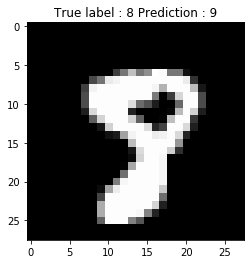

In [26]:
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title('True label : {} Prediction : {}'.format(y_test[i],predictions[i]))